# HR Salary Dashboard - Train the Dataset and Predict Salary

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Loading dataset into the python environment
df=pd.read_csv(r'c:\users\anu\Downloads\HR_comma_sep (1).csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


There are 15000 rows and 10 columns in this dataset.

The details of the given data set:
1.Satisfaction_level: Level of employee satisfaction
2.Last_evaluation: Rating from last rating
3.Number_project: Number of projects worked
4.Average_montly_hours: Monthly average hours worked
5.Time_spend_company: Years of work in the company
6.Work_accident: 0 - Did not have an accident at work and 1 - Had an accident at work
7.Left: Dismissal indicator, 0 - Contracted and 1 - Off
8.Promotion_last_5years: Promotion indicative, 0 - No and 1 - Yes
9.Sales: Department
10.Salary: Salary, Low, Medium and High


# Understanding Data set

In [4]:
#checking the shape of a data set
df.shape

(14999, 10)

To print the first and last 5 rows

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
df.columns #These are the 10 columns in this HR data.

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isna().sum()#checking missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There are no missing values

In [11]:
df.sales.nunique()

10

In [12]:
df["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

There are 10 different sales departments.

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The describe() method is used to get a summary of numeric values in the HR Salary dataset. It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. It also counts the number of variables in the dataset

# 2.EDA (Exploratory Data Analysis)

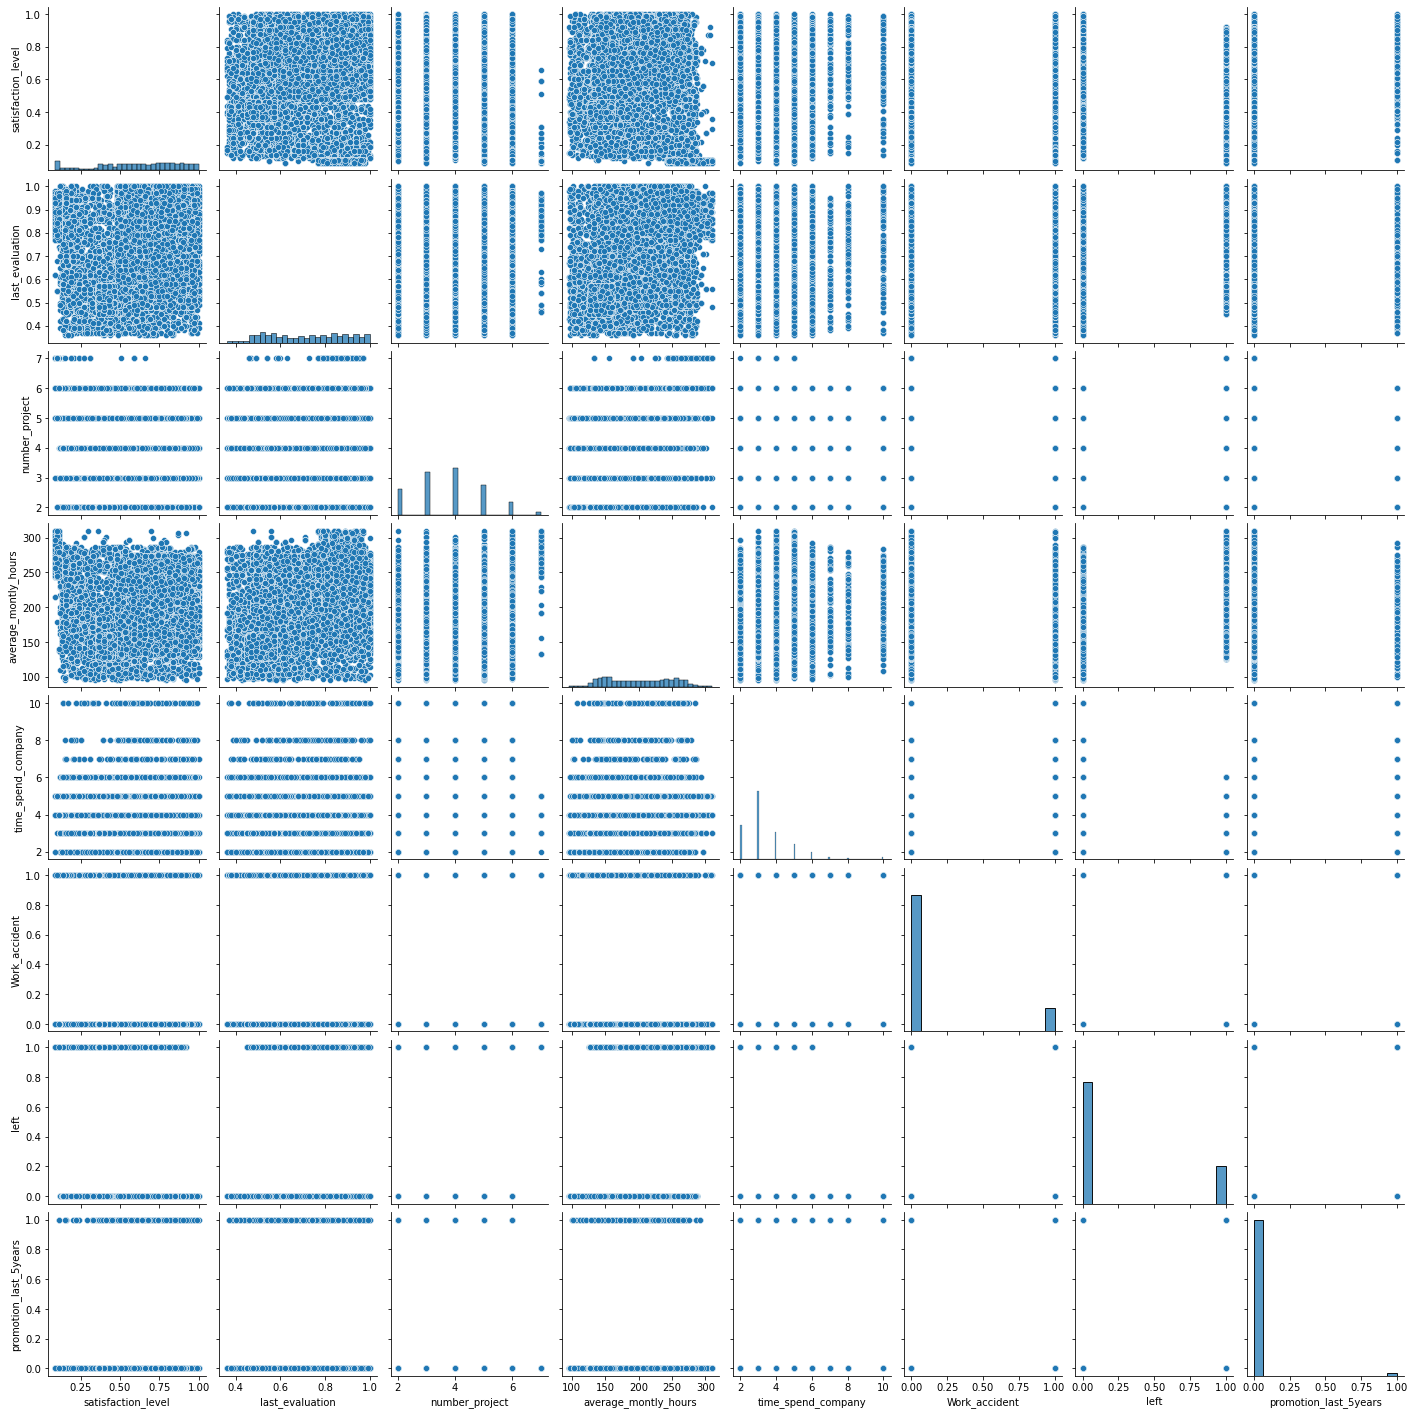

In [14]:
sb.pairplot(df)

In [15]:
#To plot employee satisfaction graph

C:\Users\anu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level'>

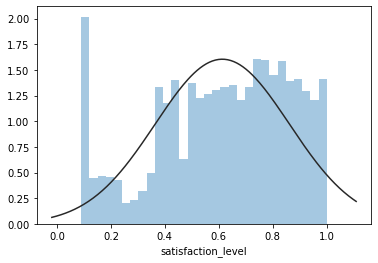

In [16]:
import warnings
warnings.filterwarnings
from scipy.stats import norm
sb.distplot(df["satisfaction_level"], fit=norm, kde=False)

In [17]:
#To plot the employees evaluation

C:\Users\anu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation'>

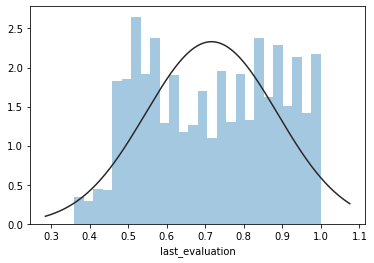

In [18]:
sb.distplot(df["last_evaluation"], fit=norm, kde=False)

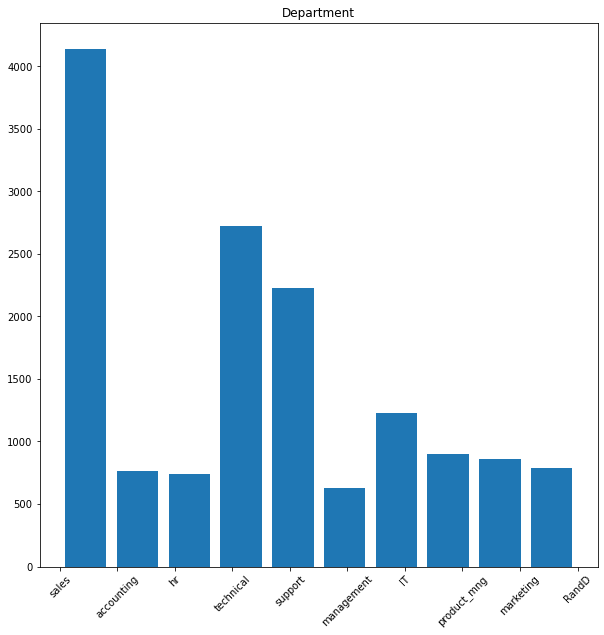

In [19]:
plt.figure(figsize=(10,10))
plt.hist(df["sales"],rwidth=0.8)
plt.title("Department")

plt.xticks(rotation=45)

plt.show()

The Sales department is the one with the largest number of employees, followed by the Technical and Support department. Management is the smallest of them with 630 employees.

# Graph of Salary according to the time spend in the company

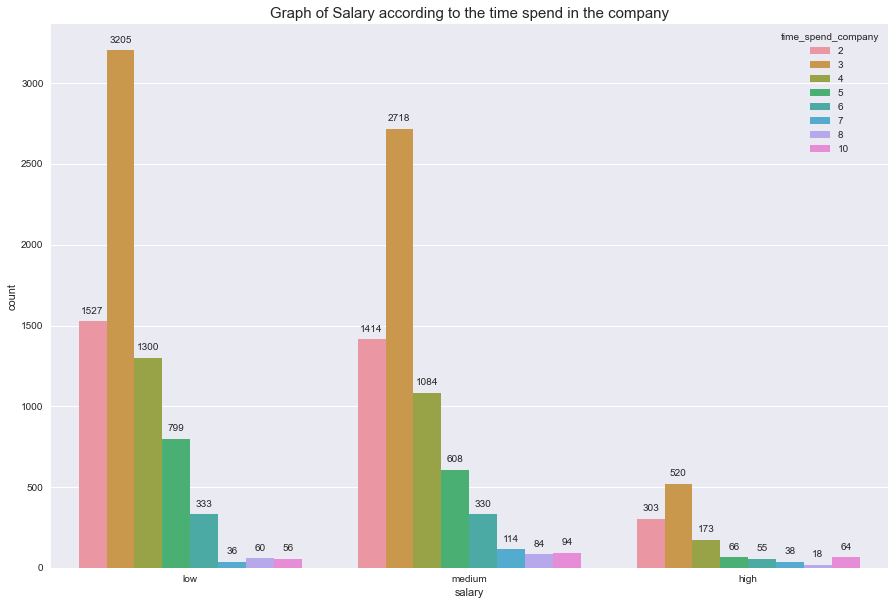

In [20]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
ax = sb.countplot(x="salary",data=df,hue='time_spend_company')
plt.title("Graph of Salary according to the time spend in the company",size=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

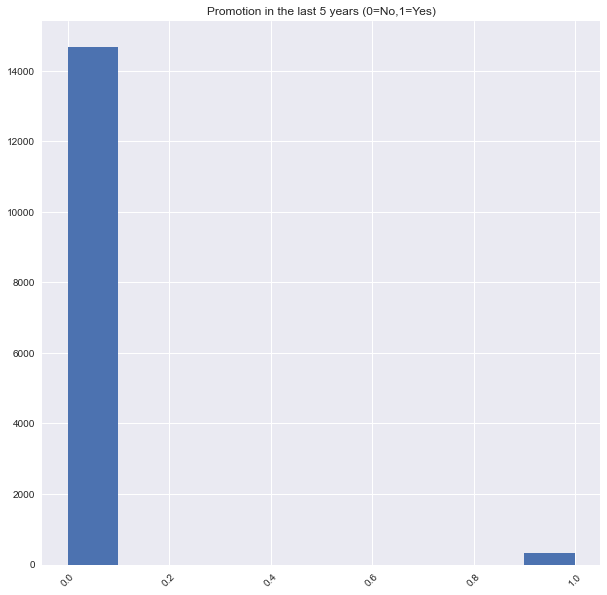

In [21]:
plt.figure(figsize=(10,10))
plt.hist(df["promotion_last_5years"])
plt.title("Promotion in the last 5 years (0=No,1=Yes)")

plt.xticks(rotation=45)

plt.show()

Which indicates that Very few people promoted in the last 5 years.

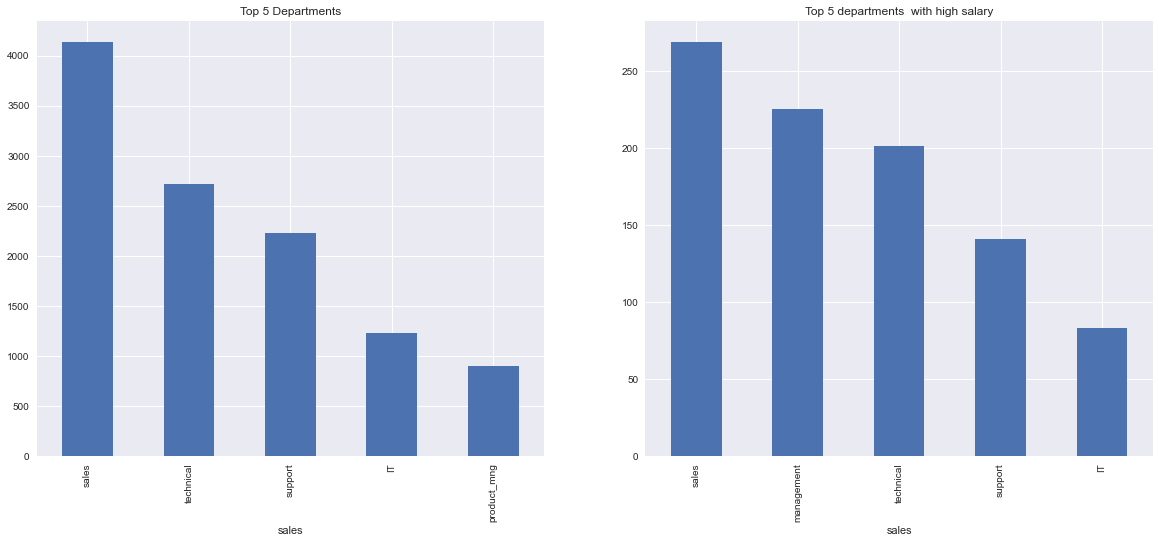

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df.pivot_table(index = ['sales'], aggfunc ='size').sort_values(ascending = False).head(5).plot(kind='bar', ax=ax1).set_title("Top 5 Departments")
df[df.salary == "high"].pivot_table(index = ['sales'], aggfunc ='size').sort_values(ascending = False).head(5).plot(kind='bar', ax=ax2).set_title("Top 5 departments  with high salary")
plt.show()

The sales Department is the top department which offers high salary to employees.

<AxesSubplot:>

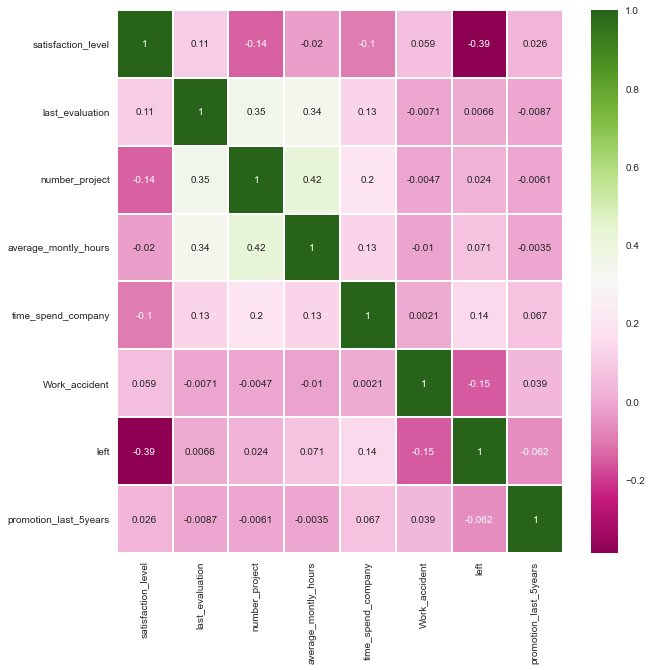

In [23]:
#Correlation
# Checking and plotting Correlation :
corrmatrix=df.corr()
plt.subplots(figsize=(10,10))
sb.heatmap(corrmatrix,annot=True,linewidth=0.2,cmap='PiYG')

Outlier

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'satisfaction_level'),
  Text(2, 0, 'last_evaluation'),
  Text(3, 0, 'number_project'),
  Text(4, 0, 'average_montly_hours'),
  Text(5, 0, 'time_spend_company'),
  Text(6, 0, 'Work_accident'),
  Text(7, 0, 'left'),
  Text(8, 0, 'promotion_last_5years')])

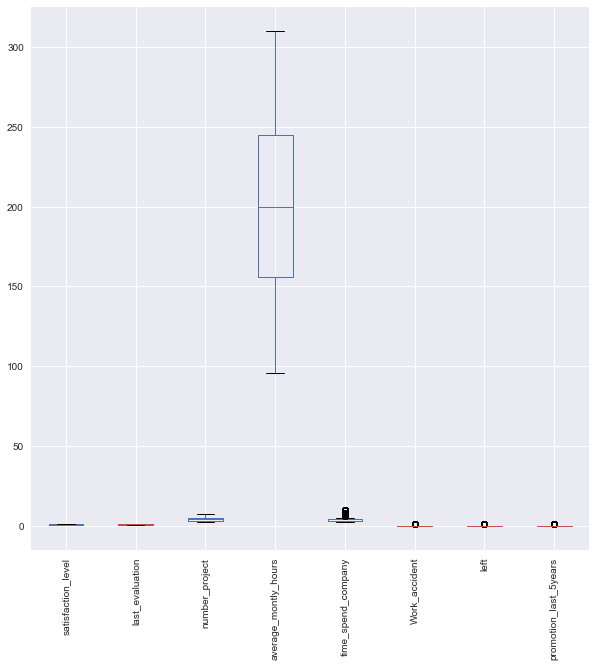

In [24]:
plt.figure(figsize=(10, 10))
df.boxplot()
plt.xticks(rotation=90) 
## This will form a Box-plot for the skewed feature of specified columns

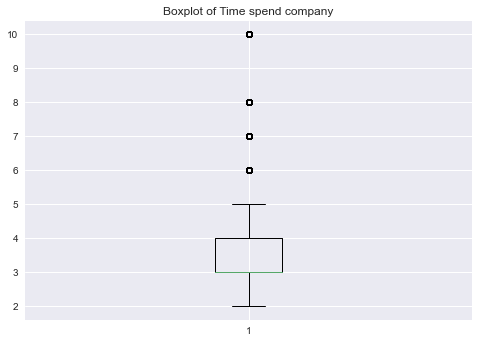

In [25]:
plt.boxplot(df["time_spend_company"])
plt.title("Boxplot of Time spend company")
plt.show()

In [26]:
Q1=np.percentile(df['time_spend_company'],25,interpolation='midpoint')
Q2=np.percentile(df['time_spend_company'],50,interpolation='midpoint')
Q3=np.percentile(df['time_spend_company'],75,interpolation='midpoint')

In [27]:
print(Q1)
print(Q2)
print(Q3)

3.0
3.0
4.0


In [28]:
df['time_spend_company'].median()

3.0

In [29]:
#To find IQR
IQR= Q3-Q1

In [30]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR


In [31]:
print("Lower Limit is :",lower_lim)
print("Upper Limit is :",upper_lim)

Lower Limit is : 1.5
Upper Limit is : 5.5


In [32]:
outlier=[]
for x in df['time_spend_company']:
    if((x>upper_lim) or (x<lower_lim)):
        outlier.append(x)
outlier        

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [33]:
ind1=df['time_spend_company']>upper_lim
ind1=df.loc[ind1].index
ind1

Int64Index([    1,    17,    34,    47,    67,    83,    99,   122,   161,
              191,
            ...
            14836, 14839, 14870, 14896, 14936, 14942, 14947, 14977, 14986,
            14993],
           dtype='int64', length=1282)

In [34]:
df.drop(ind1,inplace=True)
df.shape

(13717, 10)

Text(0.5, 1.0, 'Boxplot of Times spend company')

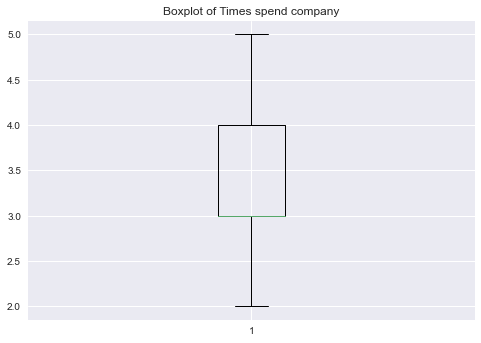

In [35]:
plt.boxplot(df["time_spend_company"])
plt.title("Boxplot of Times spend company")


Work Accident

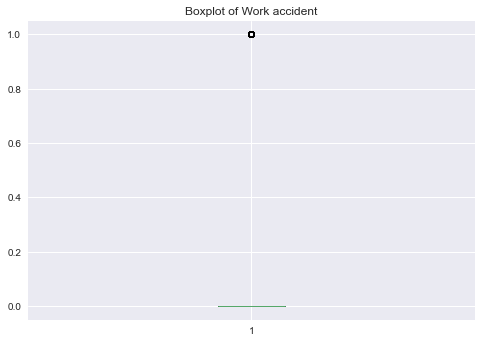

In [36]:
plt.boxplot(df["Work_accident"])
plt.title("Boxplot of Work accident")
plt.show()

In [37]:
Q1=np.percentile(df['Work_accident'],25,interpolation='midpoint')
Q2=np.percentile(df['Work_accident'],50,interpolation='midpoint')
Q3=np.percentile(df['Work_accident'],75,interpolation='midpoint')

In [38]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [39]:
IQR= Q3-Q1

In [40]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR


In [41]:
print("Lower Limit is :",lower_lim)
print("Upper Limit is :",upper_lim)

Lower Limit is : 0.0
Upper Limit is : 0.0


In [42]:
outlier=[]
for x in df['Work_accident']:
    if((x>upper_lim) or (x<lower_lim)):
        outlier.append(x)
outlier 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [43]:
ind1=df['Work_accident']>upper_lim
ind1=df.loc[ind1].index
ind1

Int64Index([   18,    68,   120,   123,   136,   148,   256,   258,   276,
              279,
            ...
            14767, 14823, 14838, 14880, 14891, 14940, 14945, 14949, 14989,
            14990],
           dtype='int64', length=1942)

In [44]:
df.drop(ind1,inplace=True)
df.shape

(11775, 10)

Left

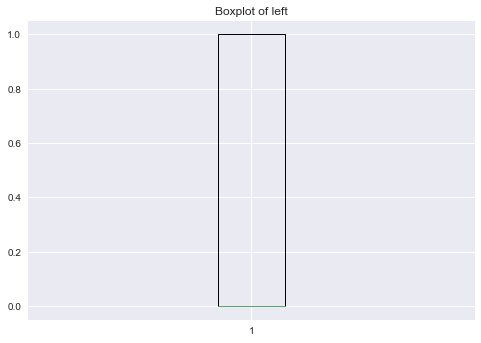

In [45]:
plt.boxplot(df["left"])
plt.title("Boxplot of left")
plt.show()

In [46]:
Q1=np.percentile(df['left'],25,interpolation='midpoint')
Q2=np.percentile(df['left'],50,interpolation='midpoint')
Q3=np.percentile(df['left'],75,interpolation='midpoint')

In [47]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [48]:
IQR= Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print("Lower Limit is :",lower_lim)
print("Upper Limit is :",upper_lim)

Lower Limit is : -1.5
Upper Limit is : 2.5


In [49]:
outlier=[]
for x in df['left']:
    if((x>upper_lim) or (x<lower_lim)):
        outlier.append(x)
outlier 

[]

In [50]:
ind1=df['left']>upper_lim
ind1=df.loc[ind1].index
ind1

Int64Index([], dtype='int64')

In [51]:
df.drop(ind1,inplace=True)
df.shape

(11775, 10)

promotion_last_5years

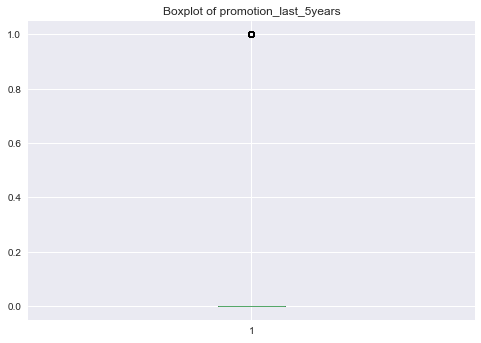

In [52]:
plt.boxplot(df["promotion_last_5years"])
plt.title("Boxplot of promotion_last_5years")
plt.show()

In [53]:
Q1=np.percentile(df['promotion_last_5years'],25,interpolation='midpoint')
Q2=np.percentile(df['promotion_last_5years'],50,interpolation='midpoint')
Q3=np.percentile(df['promotion_last_5years'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [54]:
IQR= Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print("Lower Limit is :",lower_lim)
print("Upper Limit is :",upper_lim)

Lower Limit is : 0.0
Upper Limit is : 0.0


In [55]:
outlier=[]
for x in df['promotion_last_5years']:
    if((x>upper_lim) or (x<lower_lim)):
        outlier.append(x)
outlier 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [56]:
ind1=df['promotion_last_5years']>upper_lim
ind1=df.loc[ind1].index
ind1

Int64Index([   82,   171,   287,   584,   751,  1667,  4499,  4501,  4502,
             4504,
            ...
            14100, 14101, 14103, 14104, 14105, 14150, 14293, 14382, 14498,
            14795],
           dtype='int64', length=183)

In [57]:
df.drop(ind1,inplace=True)
df.shape

(11592, 10)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'satisfaction_level'),
  Text(2, 0, 'last_evaluation'),
  Text(3, 0, 'number_project'),
  Text(4, 0, 'average_montly_hours'),
  Text(5, 0, 'time_spend_company'),
  Text(6, 0, 'Work_accident'),
  Text(7, 0, 'left'),
  Text(8, 0, 'promotion_last_5years')])

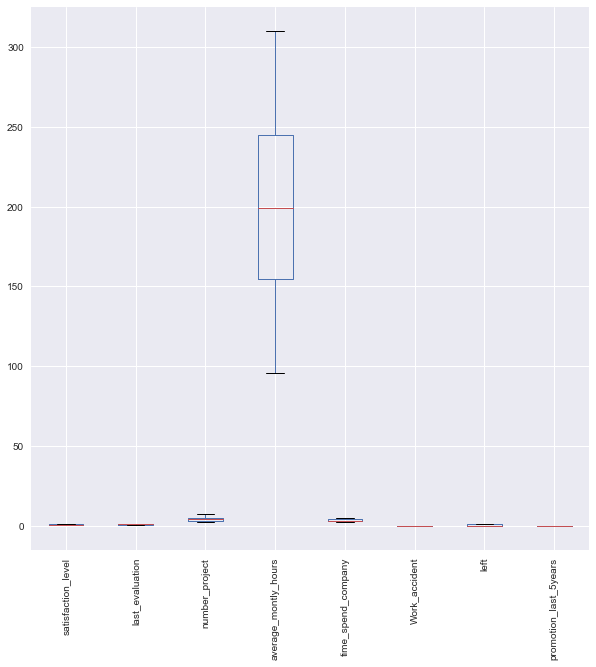

In [58]:
plt.figure(figsize=(10, 10))
df.boxplot()
plt.xticks(rotation=90) 

Preprocessing

In [59]:
#encoding
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11592 non-null  float64
 1   last_evaluation        11592 non-null  float64
 2   number_project         11592 non-null  int64  
 3   average_montly_hours   11592 non-null  int64  
 4   time_spend_company     11592 non-null  int64  
 5   Work_accident          11592 non-null  int64  
 6   left                   11592 non-null  int64  
 7   promotion_last_5years  11592 non-null  int64  
 8   sales                  11592 non-null  object 
 9   salary                 11592 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 996.2+ KB


In [61]:
df.sales.nunique()

10

In [62]:
dummies=pd.get_dummies(df["sales"],drop_first=True)
df=pd.concat([df.drop(["sales"],axis=1),dummies],axis=1)


In [63]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,1,0


In [64]:
df.shape

(11592, 18)

In [65]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')

Scaling

In [66]:
#standard scaling
y=df["salary"]
x=df.drop("salary",axis=1)

In [67]:
x.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.0,11592.000000,11592.0,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,0.604187,0.714372,3.785283,200.776743,3.185732,0.0,0.275017,0.0,0.050983,0.052795,0.052105,0.034334,0.053485,0.060990,0.272170,0.151656,0.186335
std,0.251503,0.171659,1.275607,50.452480,0.910977,0.0,0.446542,0.0,0.219973,0.223634,0.222248,0.182094,0.225009,0.239323,0.445096,0.358703,0.389394
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,0.560000,3.000000,155.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.630000,0.720000,4.000000,199.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
from sklearn import preprocessing
std=preprocessing.StandardScaler()
x=std.fit_transform(x)


In [69]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,11592.0,1.159200e+04,11592.0,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04
mean,5.296737e-16,2.834746e-16,-4.055111e-17,-2.212018e-16,4.429076e-15,0.0,-5.137559e-15,0.0,1.419610e-15,1.192920e-15,2.662083e-15,-4.576562e-15,-3.836073e-16,3.400278e-15,2.183668e-16,-1.395096e-15,2.816061e-15
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.0,1.000043e+00,0.0,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-2.044542e+00,-2.064487e+00,-1.399616e+00,-2.076831e+00,-1.301661e+00,0.0,-6.159084e-01,0.0,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-6.115129e-01,-4.228091e-01,-4.785474e-01
25%,-6.926118e-01,-8.993345e-01,-6.156416e-01,-9.073631e-01,-2.038906e-01,0.0,-6.159084e-01,0.0,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-6.115129e-01,-4.228091e-01,-4.785474e-01
50%,1.026413e-01,3.278750e-02,1.683326e-01,-3.521768e-02,-2.038906e-01,0.0,-6.159084e-01,0.0,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-6.115129e-01,-4.228091e-01,-4.785474e-01
75%,8.183691e-01,9.066519e-01,9.523069e-01,8.765707e-01,8.938798e-01,0.0,1.623618e+00,0.0,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,1.635288e+00,-4.228091e-01,-4.785474e-01
max,1.573860e+00,1.664001e+00,2.520255e+00,2.164967e+00,1.991650e+00,0.0,1.623618e+00,0.0,4.314419e+00,4.235703e+00,4.265214e+00,5.303360e+00,4.206753e+00,3.923779e+00,1.635288e+00,2.365134e+00,2.089657e+00


In [70]:
df["salary"].value_counts()

low       5839
medium    4883
high       870
Name: salary, dtype: int64

# Find out which classification model gives the best result to predict Salary

Preparing the Data Setting X and y-axis and splitting the data into train and test respectively.

Since we want to predict the Salary based on given data whether it  is High or low or Medium

In [71]:
y=df["salary"]
x=df.drop("salary",axis=1)

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [73]:
print("Shape of X - Features:",x.shape)
print("Shape of y - Response:",y.shape)

Shape of X - Features: (11592, 17)
Shape of y - Response: (11592,)


In [74]:
x_train.shape

(9273, 17)

In [75]:
x_test.shape

(2319, 17)

In [76]:
y_train.shape

(9273,)

In [77]:
y_test.shape

(2319,)

# k nearest Neighbours Model

In [78]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.507546356188012,
 0.5226390685640362,
 0.5144458818456231,
 0.5196205260888314,
 0.5153083225528244,
 0.5092712376024149,
 0.5157395429064252,
 0.5127210004312204,
 0.5053902544200086,
 0.5058214747736093,
 0.5101336783096162,
 0.5053902544200086]

Text(0, 0.5, 'accuracy')

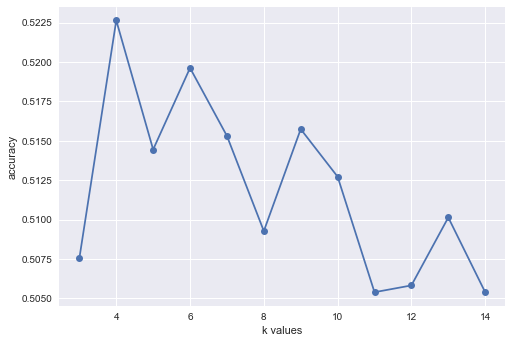

In [79]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')

In [80]:
## Creating an instance of KNeighborsClassifier with neighbours as 4
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=knn_model.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_y_pred))

Train data accuracy: 0.7059204141054675
Test data accuracy: 0.5226390685640362


# Logistic Regression

In [81]:
# import the class LogisticRegression from sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
# train the model on the training set
# create an instance of the LogisticRegression class using the default parameters
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train, y_train)
# make predictions on the testing set
y_pred = logreg.predict(x_test)
# compare actual response values (y_test) with predicted response values (y_pred)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=logreg.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.5011323196376577
Test data accuracy: 0.49202242345838726


# Decision Tree Classifier

In [82]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Predict Accuracy Score
dtc_y_pred = dtc.predict(x_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=dtc.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=dtc_y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Train data accuracy: 0.9991372802760703
Test data accuracy: 0.5847347994825356
Accuracy: 49.20%


Based on the performance metrics score , the Decision Tree Classifier model shows more accuracy than Linear Regression model and  knn. 

# SVM Classification model

# 1.SVM model with linear kernal

In [83]:
## import the SVM Classification Class and fit the training set to our model. 
from sklearn.svm import SVC
## The kernel used here is the “rbf” kernel which stands for Radial Basis Function.
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [84]:
## predict the values for the Test set and the values are stored to the variable y_pred.
y_pred = classifier.predict(x_test) 
y_pred

array(['low', 'low', 'medium', ..., 'low', 'low', 'low'], dtype=object)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,  146,   26],
       [   0, 1069,   94],
       [   0,  912,   72]], dtype=int64)

In [86]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.5085732772565513
Test data accuracy: 0.49202242345838726


# 2) SVM model with rbf kernal/Gaussian kernel

In [87]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[   0,  172,    0],
       [   0, 1163,    0],
       [   0,  984,    0]], dtype=int64)

In [88]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=Y_pred))

Train data accuracy: 0.5042596786369028
Test data accuracy: 0.5015092712376024


# Random Forest Classification

In [89]:
from sklearn.ensemble import RandomForestClassifier

#Create an instance of  RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(x_test)
rf.fit(x_train,y_train)

# prediction on test set
rf_y_pred=rf.predict(x_test)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=rf.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=rf_y_pred))
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Train data accuracy: 0.9991372802760703
Test data accuracy: 0.6127641224665804
Accuracy: 61.28%


# Gradient Boosting Model

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [91]:
gb_pred

array(['medium', 'low', 'low', ..., 'low', 'low', 'low'], dtype=object)

# Extreme gradient boosting Model

In [92]:
!pip3 install xgboost

In [93]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

[17:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [95]:
# make predictions for test data
xgby_pred = model.predict(x_test)
##predictions = [round(value) for value in y_pred]

In [96]:
# evaluate predictions
accuracy = accuracy_score(y_test, xgby_pred)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=xgby_pred))
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

Train data accuracy: 0.8448182896581473
Test data accuracy: 0.5605864596808969


Based on the performance metrics score , the Random Forest model shows more accuracy than any other models and it seems to be apt for this model.

# Model Fine Tuning

Applying PCA with Principal Components for feature importance

In [97]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,1,0


In [98]:
from sklearn.preprocessing import MinMaxScaler
min_max =preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [99]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.0,11592.000000,11592.0,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,0.565040,0.553706,0.357057,0.489611,0.395244,0.0,0.275017,0.0,0.050983,0.052795,0.052105,0.034334,0.053485,0.060990,0.272170,0.151656,0.186335
std,0.276377,0.268217,0.255121,0.235759,0.303659,0.0,0.446542,0.0,0.219973,0.223634,0.222248,0.182094,0.225009,0.239323,0.445096,0.358703,0.389394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373626,0.312500,0.200000,0.275701,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.593407,0.562500,0.400000,0.481308,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.791209,0.796875,0.600000,0.696262,0.666667,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
dummies = pd.get_dummies(df["sales"],drop_first=True)
df=pd.concat([df.drop(["sales"],axis=1),dummies],axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,1
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,0,1
5,0.41,0.50,2,153,3,0,1,0,low,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,1,0,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,1,0,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,1,0,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,1,0,0


In [101]:
# Import label encoder
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'gender'.
df["salary"]= label_encoder.fit_transform(df["salary"])
 
df["salary"].unique()

array([1, 2, 0])

In [102]:
df["salary"].items()

In [103]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,1
count,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,11592.0,1.159200e+04,11592.0,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04
mean,5.296737e-16,2.834746e-16,-4.055111e-17,-2.212018e-16,4.429076e-15,0.0,-5.137559e-15,0.0,-4.165922e-15,1.419610e-15,1.192920e-15,2.662083e-15,-4.576562e-15,-3.836073e-16,3.400278e-15,-1.395096e-15,2.816061e-15,2.183668e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.0,1.000043e+00,0.0,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-2.044542e+00,-2.064487e+00,-1.399616e+00,-2.076831e+00,-1.301661e+00,0.0,-6.159084e-01,0.0,-2.194091e+00,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-4.228091e-01,-4.785474e-01,-6.115129e-01
25%,-6.926118e-01,-8.993345e-01,-6.156416e-01,-9.073631e-01,-2.038906e-01,0.0,-6.159084e-01,0.0,-5.642349e-01,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-4.228091e-01,-4.785474e-01,-6.115129e-01
50%,1.026413e-01,3.278750e-02,1.683326e-01,-3.521768e-02,-2.038906e-01,0.0,-6.159084e-01,0.0,-5.642349e-01,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-4.228091e-01,-4.785474e-01,-6.115129e-01
75%,8.183691e-01,9.066519e-01,9.523069e-01,8.765707e-01,8.938798e-01,0.0,1.623618e+00,0.0,1.065621e+00,-2.317809e-01,-2.360883e-01,-2.344548e-01,-1.885597e-01,-2.377130e-01,-2.548564e-01,-4.228091e-01,-4.785474e-01,1.635288e+00
max,1.573860e+00,1.664001e+00,2.520255e+00,2.164967e+00,1.991650e+00,0.0,1.623618e+00,0.0,1.065621e+00,4.314419e+00,4.235703e+00,4.265214e+00,5.303360e+00,4.206753e+00,3.923779e+00,2.365134e+00,2.089657e+00,1.635288e+00


In [104]:
scaled_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,1
0,-0.891425,-1.074107,-1.399616,-0.867720,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,-0.422809,-0.478547,1.635288
1,-1.965017,0.964910,2.520255,1.411751,0.893880,0.0,1.623618,0.0,1.065621,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,-0.422809,-0.478547,1.635288
2,0.460505,0.906652,0.952307,0.440498,1.991650,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,-0.422809,-0.478547,1.635288
3,-0.931188,-1.132365,-1.399616,-0.828077,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,-0.422809,-0.478547,1.635288
4,-0.772137,-1.248880,-1.399616,-0.947006,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,-0.422809,-0.478547,1.635288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,-0.811900,-0.841077,-1.399616,-0.986649,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,2.365134,-0.478547,-0.611513
11588,-0.931188,-1.365396,-1.399616,-0.808256,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,2.365134,-0.478547,-0.611513
11589,-0.931188,-1.074107,-1.399616,-1.145221,-0.203891,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,2.365134,-0.478547,-0.611513
11590,-1.965017,1.430971,1.736281,1.570323,0.893880,0.0,1.623618,0.0,-0.564235,-0.231781,-0.236088,-0.234455,-0.18856,-0.237713,-0.254856,2.365134,-0.478547,-0.611513


#Applying PCA with Principal Components = 2
#Now let us apply PCA to the entire dataset and reduce it into two components. We are using the PCA function of sklearn.decomposition module.
#After applying PCA we concatenate the results back with the gender column for better understanding.

In [105]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

finalDf=pd.concat((principalDf, df["salary"]), axis = 1)
finalDf

,principal component 1,principal component 2,salary
0,-1.000852,2.582406,1
1,3.668937,1.038914,2
2,2.269240,0.605554,1
3,-0.994983,2.617069,1
4,-1.136566,2.607287,1
...,...,...,...
11587,-0.954263,2.129686,1
11588,-1.045477,2.357348,1
11589,-1.089463,2.329663,1
11590,3.540260,0.677041,1


Text(0, 0.5, 'pc2')

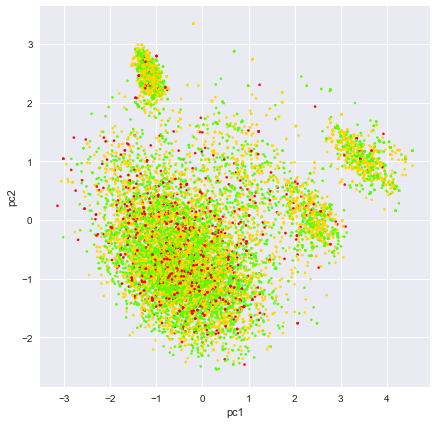

In [106]:
#Visualizing Data in 2 Dimension Scatter Plot
#Let us now visualize the dataset that has been reduced to two components with the help of a scatter plot.
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf["salary"],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [107]:
#Applying PCA with Principal Components = 3
#Just like earlier, let us again apply PCA to the entire dataset to produce 3 components.
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(scaled_data)

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf1.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
finalDf1=pd.concat((principalDf1, df['salary']), axis = 1)
finalDf1

,principal component 1,principal component 2,principal component 3,salary
0,-1.003439,2.604994,1.495020,1
1,3.659028,1.081533,1.748930,2
2,2.282795,0.570887,1.902415,1
3,-0.998155,2.640531,1.489660,1
4,-1.138696,2.626741,1.492552,1
...,...,...,...,...
11587,-0.948740,2.111056,-0.997850,1
11588,-1.043187,2.341191,-1.032008,1
11589,-1.083278,2.308378,-1.023734,1
11590,3.536627,0.686649,-0.738917,1


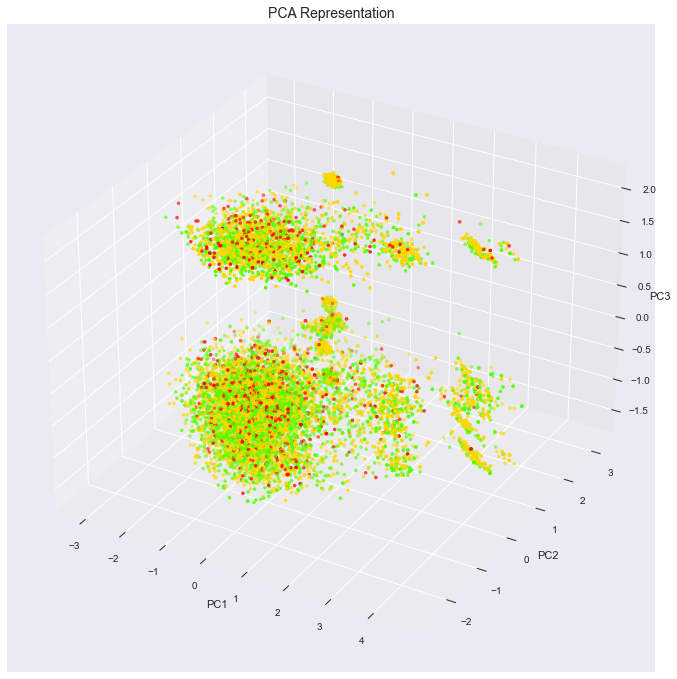

In [108]:
#Visualizing Data in 3 Dimension Scatter Plot
#Let us visualize the three PCA components with the help of 3-D Scatter plot.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf1['principal component 1'],finalDf1['principal component 2'],finalDf1['principal component 3'],c=finalDf1['salary'], cmap = 'prism', s=10)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x = finalDf1.iloc[:,[0,1,2]].values
y = finalDf1['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [110]:
#Standardizing the Dataset
#This time we apply standardization to both train and test datasets but separately.
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.
x_train_pca = scaler.transform(x_train)
x_test_pca = scaler.transform(x_test)

# 1) Linear Regression Model

In [111]:
# import the class LogisticRegression from sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
# train the model on the training set
# create an instance of the LogisticRegression class using the default parameters
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train_pca, y_train)
# make predictions on the testing set
y_pred = logreg.predict(x_test_pca)
# compare actual response values (y_test) with predicted response values (y_pred)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=logreg.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.5028577590855171
Test data accuracy: 0.50625269512721


# KNN Model

In [112]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train_pca,y_train)
    y_pred=classifier.predict(x_test_pca)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.5579991375592928,
 0.5476498490728763,
 0.54376886589047,
 0.5394566623544631,
 0.5411815437688658,
 0.5454937473048728,
 0.5446313065976714,
 0.5364381198792583,
 0.5291073738680466,
 0.5286761535144459,
 0.5239327296248383,
 0.5196205260888314]

Text(0, 0.5, 'accuracy')

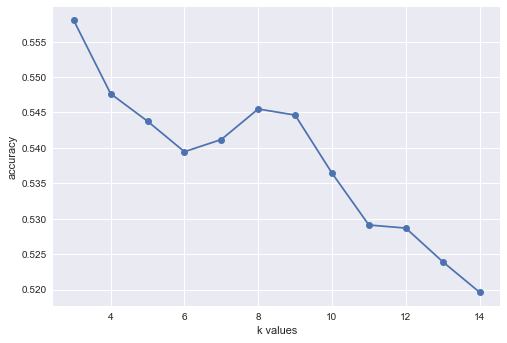

In [113]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')

In [114]:
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
classifier.fit(x_train_pca,y_train)
y_pred=classifier.predict(x_test_pca)
y_pred

array([2, 1, 2, ..., 2, 1, 2])

In [115]:
#print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(x_train_pca)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.7135770516553435
Test data accuracy: 0.54376886589047


# Decision tree Classification model

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_pca,y_train)

DecisionTreeClassifier()

In [117]:
y_pred=dt_model.predict(x_test_pca)
y_pred

array([2, 1, 1, ..., 2, 1, 1])

In [118]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=dt_model.predict(x_train_pca)))
print("Accuracy on Decision Tree Model is:",accuracy_score(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Train data accuracy: 1.0
Accuracy on Decision Tree Model is: 0.7020267356619232
Accuracy: 70.20%


# Random Forest Classification Model

In [119]:
from sklearn.ensemble import RandomForestClassifier

#Create an instance of  RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train_pca,y_train)

# prediction on test set
rf_y_pred=rf.predict(x_test_pca)

# Model Accuracy, how often is the classifier correct?
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=rf.predict(x_train_pca)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=rf_y_pred))
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Train data accuracy: 1.0
Test data accuracy: 0.7132384648555412
Accuracy: 71.32%


# SVM model with rbf kernal/Gaussian kernel

In [120]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train_pca,y_train)
Y_pred = classifier.predict(x_test_pca)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[   0,  163,    9],
       [   0, 1109,   54],
       [   0,  921,   63]], dtype=int64)

In [121]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(x_train_pca)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=Y_pred))

Train data accuracy: 0.5084654372910601
Test data accuracy: 0.5053902544200086


# Extreme gradient boosting Model

In [122]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(x_train_pca, y_train)

[17:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [123]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [124]:
# make predictions for test data
xgby_pred = model.predict(x_test_pca)
##predictions = [round(value) for value in y_pred]

In [125]:
# evaluate predictions
accuracy = accuracy_score(y_test, xgby_pred)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(x_train_pca)))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Train data accuracy: 0.8532298069664618
Accuracy: 65.20%


# Tune Hyperparameters with GridSearchCV

In [126]:
## GridSearchCV can be used on several hyperparameters to get the best values for the specified hyperparameters.
## Importing the Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [127]:
## Building Random Forest Classifier
rfc = RandomForestClassifier()

In [128]:
## Initializing GridSearchCV() object and fitting it with hyperparameters
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)
## Here, we passed the estimator object rfc, param_grid as forest_params, cv = 5 and scoring method as accuracy in to GridSearchCV() as arguments.

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [129]:
## Getting the Best Hyperparameters
print(clf.best_params_)

{'max_depth': 14, 'max_features': 3}


In [130]:
print(clf.best_score_)

0.6798284464159505


Best Params and Best Score of the Random Forest Classifier

Thus, clf.bestparams gives the best combination of tuned hyperparameters, and clf.bestscore gives the average cross-validated score of our Random Forest Classifier.